# 1 day ahead prediction:

First the directional accuracy is calculated with respect to the true denoised value: The high accuracy (+-85% accross all pairs) is expected since the data shows high autocorrelation.

However to truly reflect real-life usecase it is important to compare the predicted denoised value with the actual noisy value, to see if the models predictions can be implemented to make informed trading decisions. The results decline as expected, however with a forecasting accuracy of +-60% for all pairs --- the results show the effectiveness of the models predictions and the practical value it provides with regards to forecasting future price trends.

In [1]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

def calculate_accuracy(file_path, actual_data_path, column_number):
    # Load the data
    data = pd.read_csv(file_path)
    
    # Load the actual data
    actual_data = np.loadtxt(actual_data_path, delimiter=',')
    
    # Replace the 'Actual' column with the corresponding column from the actual data
    data['Actual'] = actual_data[-len(data):, column_number]
    
    # Check if the signs of 'Predicted' and 'Actual' are correct
    data['Correct'] = np.where((data['Predicted'] > data['Actual'].shift()) & (data['Actual'] < data['Actual'].shift()), 1,
                               np.where((data['Predicted'] < data['Actual'].shift()) & (data['Actual'] > data['Actual'].shift()), 1, 0))
    
    # Calculate the accuracy
    accuracy = data['Correct'].mean()
    
    # Calculate TP, TN, FP, FN
    TP = np.sum((data['Predicted'] > 0) & (data['Correct'] == 1))
    TN = np.sum((data['Predicted'] <= 0) & (data['Correct'] == 1))
    FP = np.sum((data['Predicted'] > 0) & (data['Correct'] == 0))
    FN = np.sum((data['Predicted'] <= 0) & (data['Correct'] == 0))
    
    # Convert continuous predictions to binary class labels
    data['Predicted'] = (data['Predicted'] > 0).astype(int)
    data['Actual'] = (data['Actual'] > 0).astype(int)
    
    # Calculate the AUC
    auc = roc_auc_score(data['Actual'], data['Predicted'])
    
    # Calculate Precision, Recall, F1 Score, and Specificity
    precision = precision_score(data['Actual'], data['Predicted'])
    recall = recall_score(data['Actual'], data['Predicted'])
    f1 = f1_score(data['Actual'], data['Predicted'])
    specificity = TN / (TN + FP)
    
    return accuracy, TP, TN, FP, FN, auc, precision, recall, f1, specificity

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example usage:
results = []
for i in range(1, 13):  # Assuming pairs are numbered from 1 to 12
    file_path = f'C:\\Users\\22941940\\2024\\Coding\\Article\\MTGNN\\data\\pair_{i}.csv'
    accuracy, TP, TN, FP, FN = calculate_accuracy(file_path)
    results.append({'Pair': i, 'Accuracy': accuracy, 'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN})

    # Plot confusion matrix
    confusion_matrix = np.array([[TP, FP], [FN, TN]])
    plt.figure(figsize=(10,7))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Rise', 'Fall'], yticklabels=['Rise', 'Fall'])
    plt.title(f'Confusion Matrix for Pair {i}')
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.savefig(f'C:\\Users\\22941940\\2024\\Coding\\Article\\MTGNN\\data\\Results\\Horizon 1\\90 day\\pair_{i}_trend_denoised.jpeg')
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

TypeError: calculate_accuracy() missing 2 required positional arguments: 'actual_data_path' and 'column_number'

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example usage:
results = []
for i in range(1, 13):  # Assuming pairs are numbered from 1 to 12
    file_path = f'C:\\Users\\22941940\\2024\\Coding\\Article\\MTGNN\\data\\Results\\Horizon 1\\90 day\\pair_{i}.csv'
    accuracy, TP, TN, FP, FN = calculate_accuracy(file_path)
    results.append({'Pair': i, 'Accuracy': accuracy, 'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN})

    # Plot confusion matrix
    confusion_matrix = np.array([[TP, FP], [FN, TN]])
    plt.figure(figsize=(10,7))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Rise', 'Fall'], yticklabels=['Rise', 'Fall'])
    plt.title(f'Confusion Matrix for Pair {i}')
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.savefig(f'C:\\Users\\22941940\\2024\\Coding\\Article\\MTGNN\\data\\Results\\Horizon 1\\90 day\\pair_{i}_trend_denoised.jpeg')
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

TypeError: calculate_accuracy() missing 2 required positional arguments: 'actual_data_path' and 'column_number'

### 128 day window for wavelet function calculation

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example usage:
results = []
for i in range(1, 13):  # Assuming pairs are numbered from 1 to 12
    file_path = f'C:\\Users\\22941940\\2024\\Coding\\Article\\MTGNN\\data\\Results\\Horizon 1\\128 day\\pair_{i}.csv'
    accuracy, TP, TN, FP, FN = calculate_accuracy(file_path)
    results.append({'Pair': i, 'Accuracy': accuracy, 'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN})

    # Plot confusion matrix
    confusion_matrix = np.array([[TP, FP], [FN, TN]])
    plt.figure(figsize=(10,7))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Rise', 'Fall'], yticklabels=['Rise', 'Fall'])
    plt.title(f'Confusion Matrix for Pair {i}')
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

TypeError: calculate_accuracy() missing 2 required positional arguments: 'actual_data_path' and 'column_number'

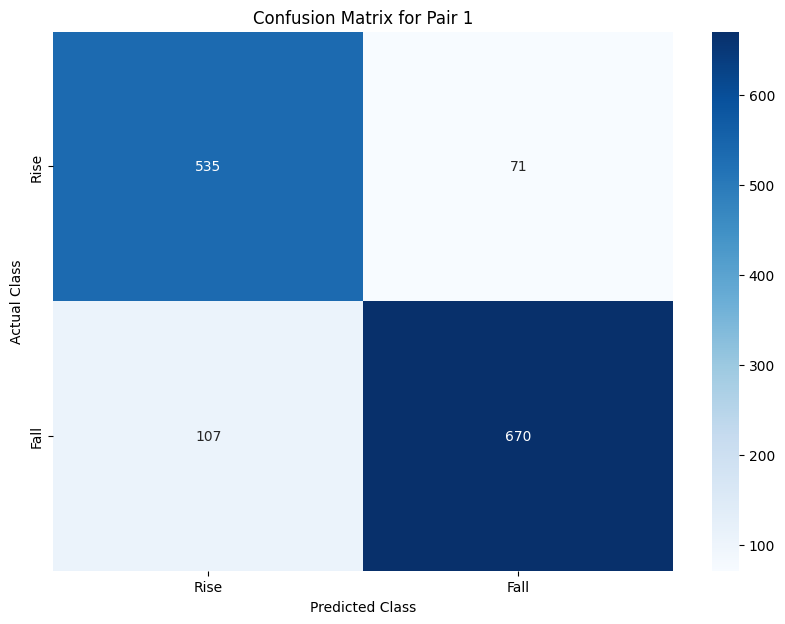

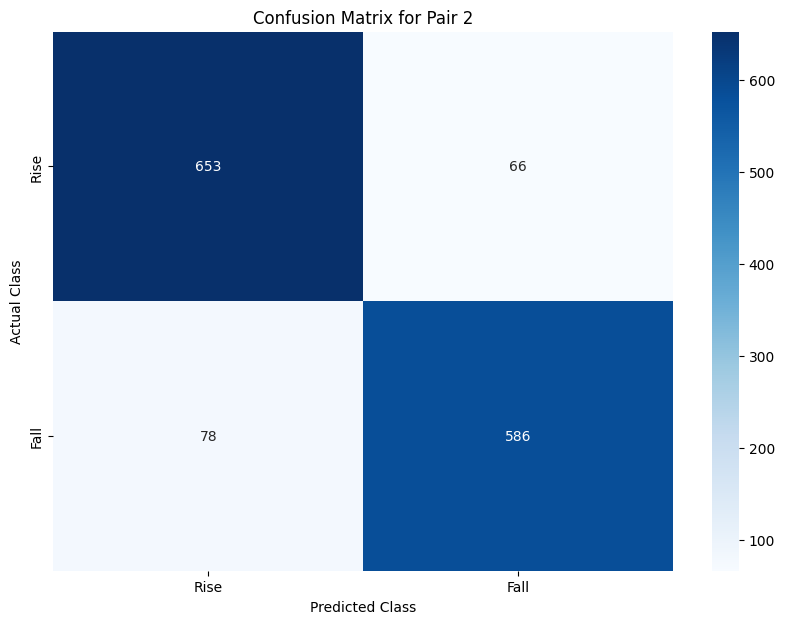

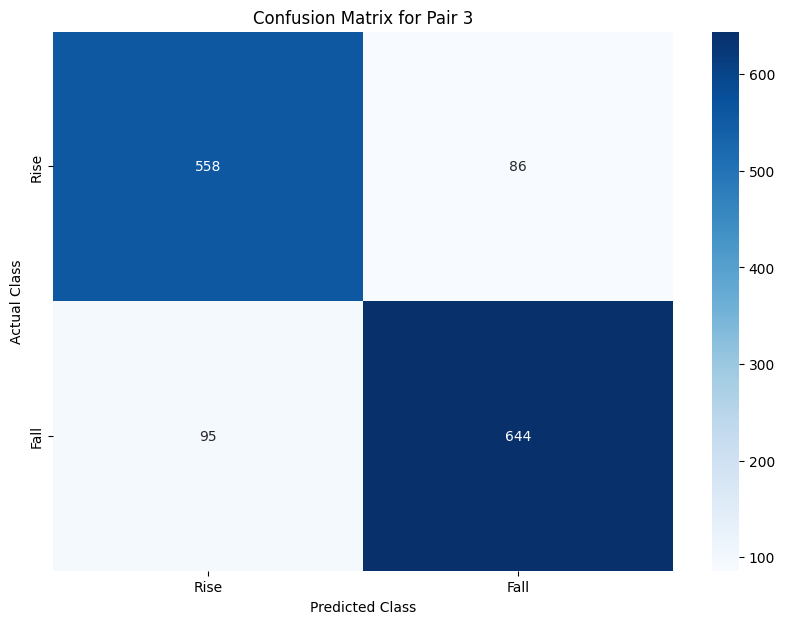

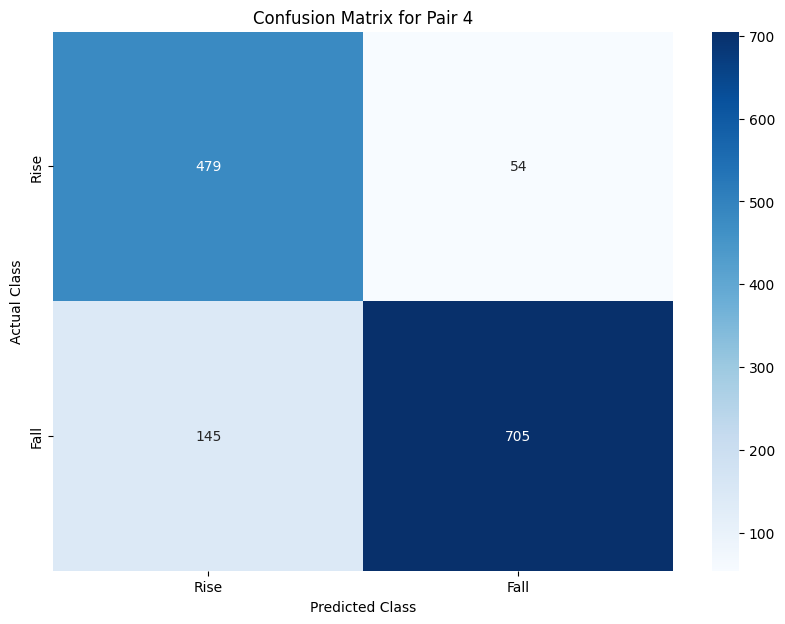

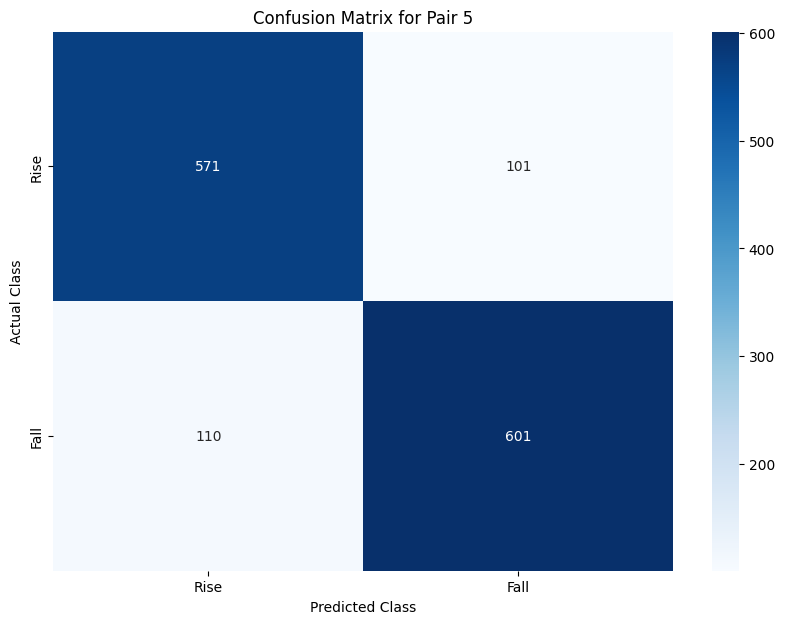

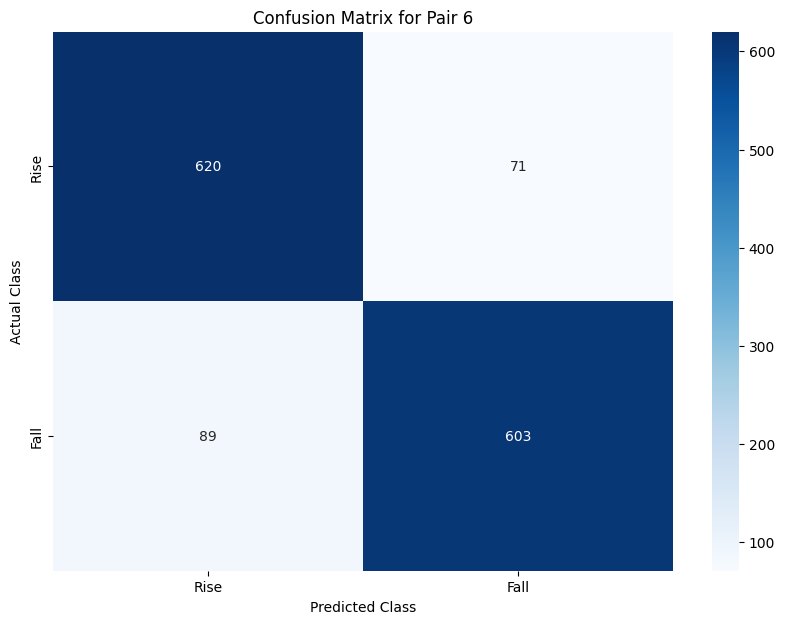

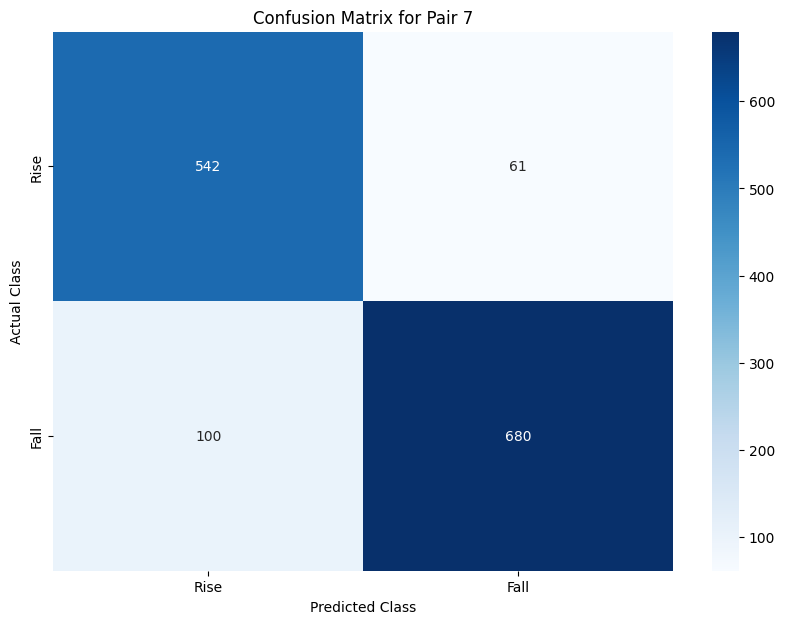

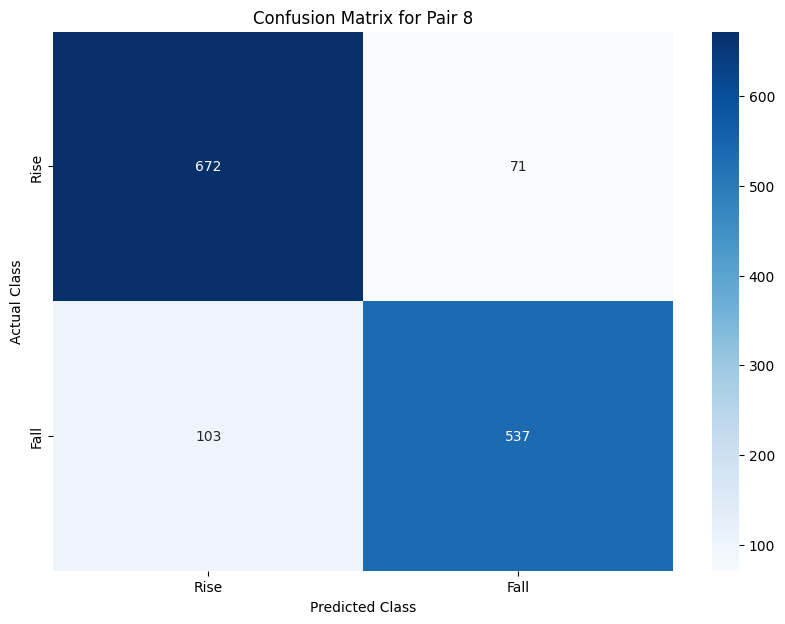

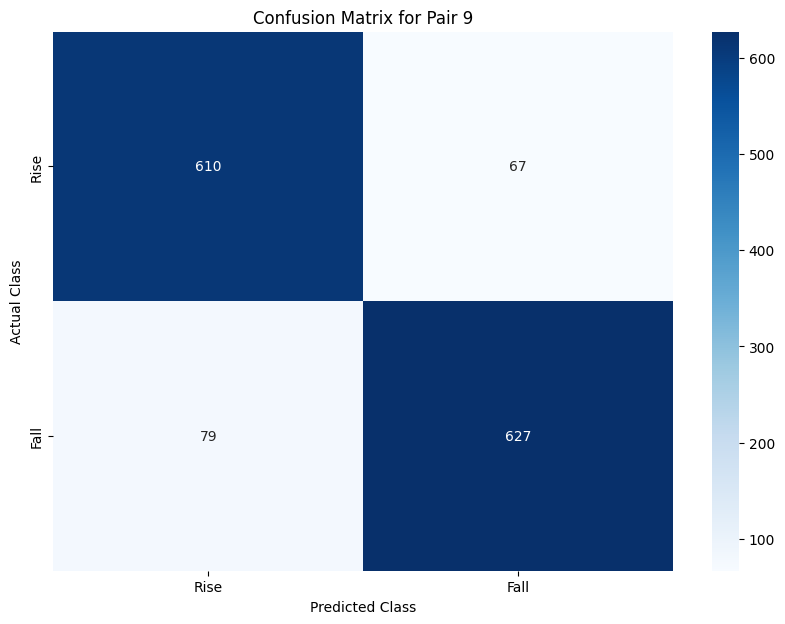

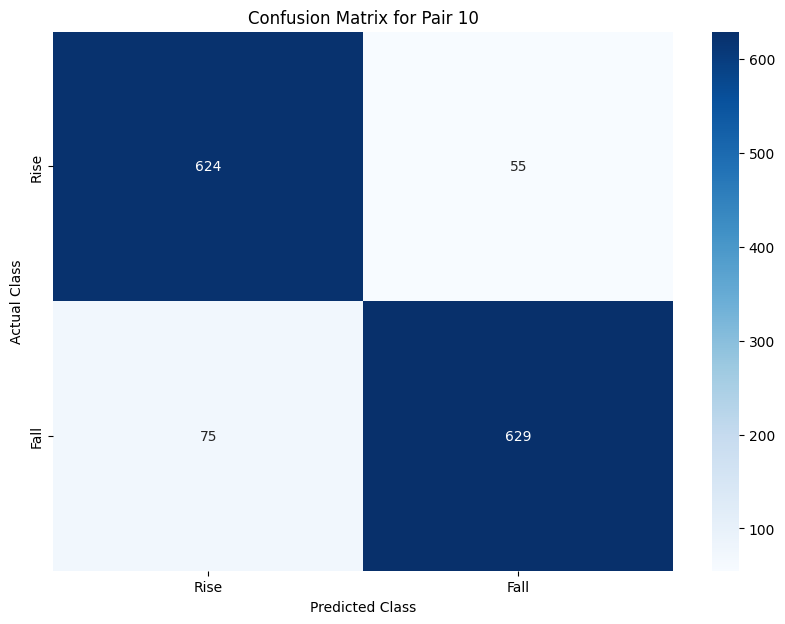

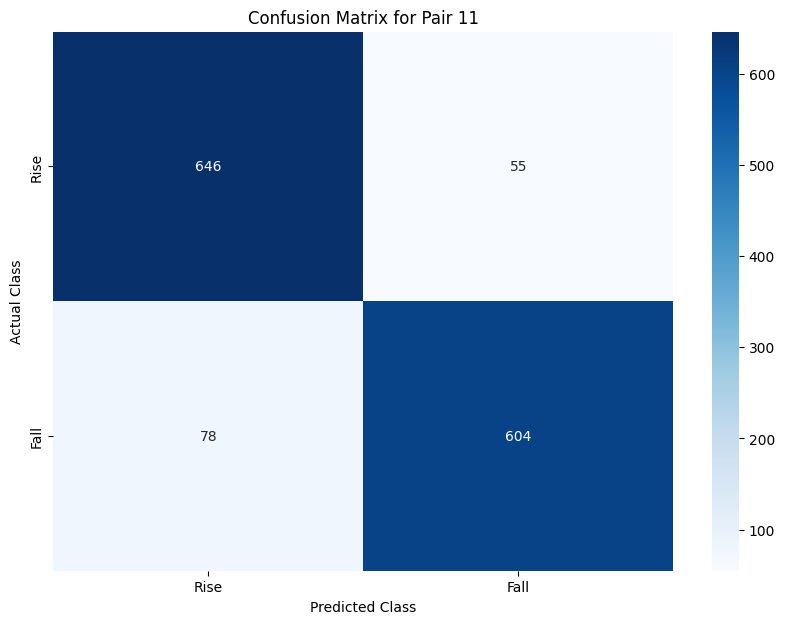

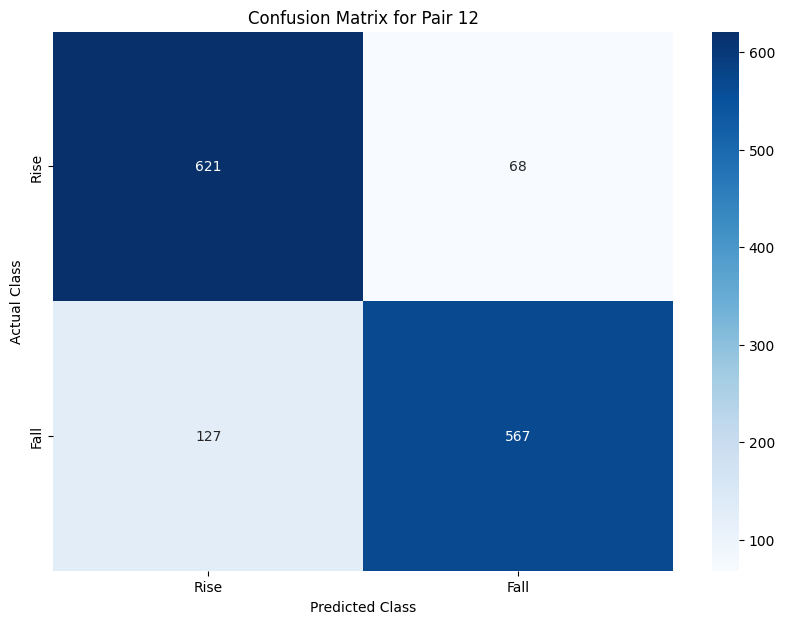

    Pair  Accuracy   TP   TN   FP   FN
0      1  0.871294  535  670   71  107
1      2  0.895879  653  586   66   78
2      3  0.869125  558  644   86   95
3      4  0.856110  479  705   54  145
4      5  0.847433  571  601  101  110
5      6  0.884309  620  603   71   89
6      7  0.883586  542  680   61  100
7      8  0.874187  672  537   71  103
8      9  0.894432  610  627   67   79
9     10  0.906001  624  629   55   75
10    11  0.903832  646  604   55   78
11    12  0.859002  621  567   68  127


In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example usage:
results = []
for i in range(1, 13):  # Assuming pairs are numbered from 1 to 12
    file_path = f'C:\\Users\\22941940\\2024\\Coding\\Article\\MTGNN\\data\\Results\\Horizon 1\\128 day\\pair_{i}.csv'
    accuracy, TP, TN, FP, FN = calculate_accuracy(file_path)
    results.append({'Pair': i, 'Accuracy': accuracy, 'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN})

    # Plot confusion matrix
    confusion_matrix = np.array([[TP, FP], [FN, TN]])
    plt.figure(figsize=(10,7))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Rise', 'Fall'], yticklabels=['Rise', 'Fall'])
    plt.title(f'Confusion Matrix for Pair {i}')
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.savefig(f'C:\\Users\\22941940\\2024\\Coding\\Article\\MTGNN\\data\\Results\\Horizon 1\\128 day\\pair_{i}_trend_denoised.jpeg')
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

1000 day window for wavelet function calculation

# 3 day ahead price forecast

## 128 day window -wavelet

## Comparing predicted denoised values to actual noisy values (Practical)

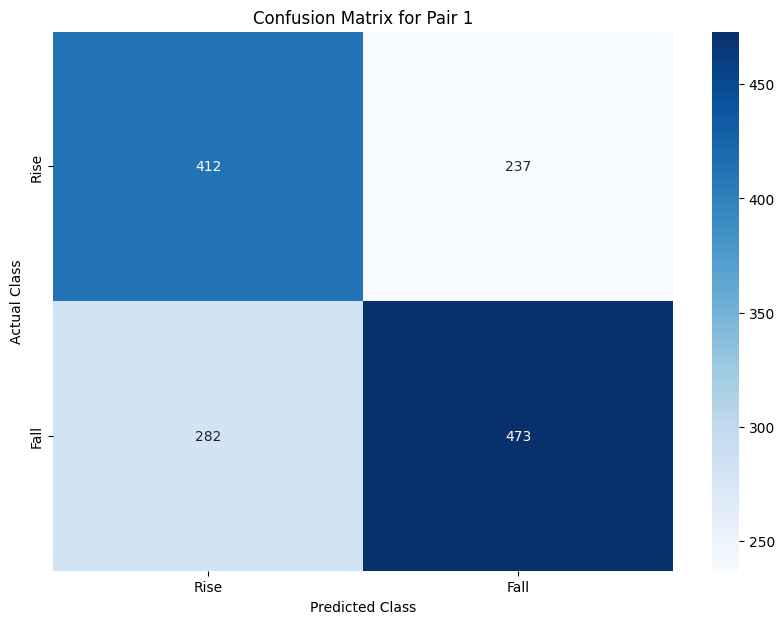

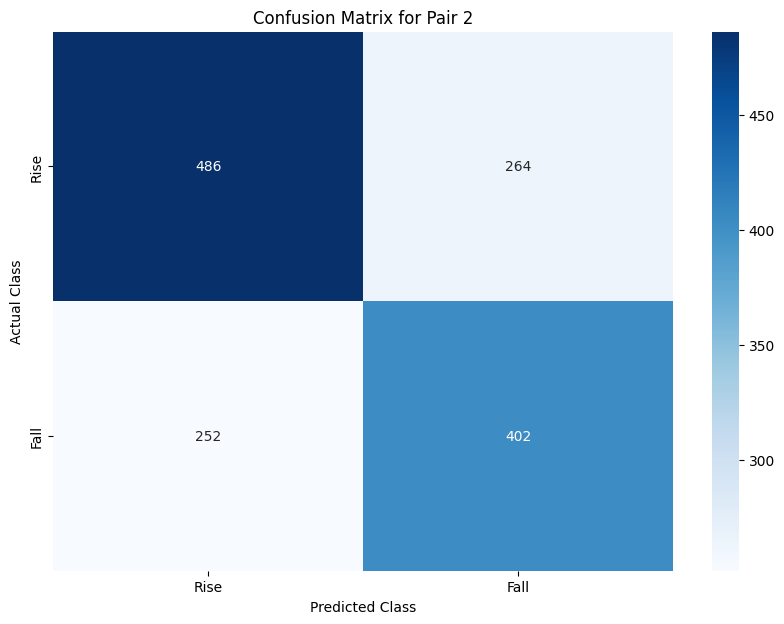

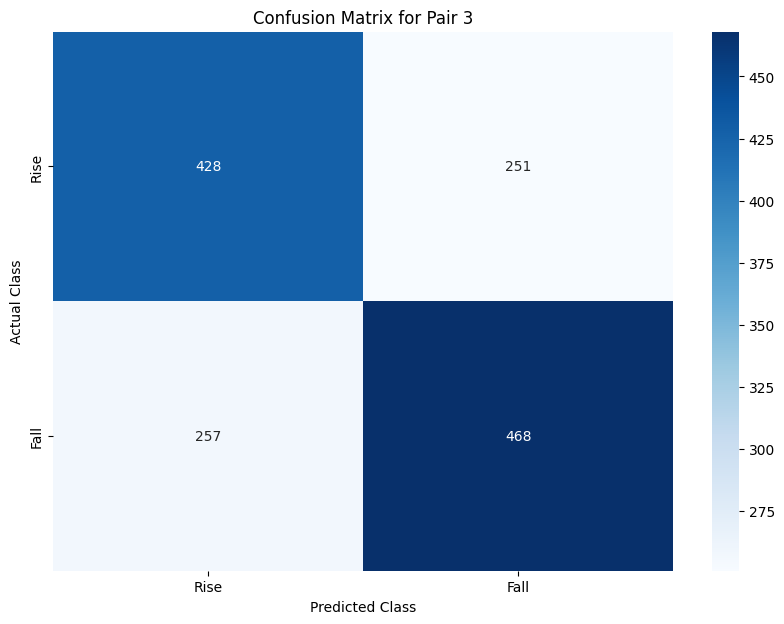

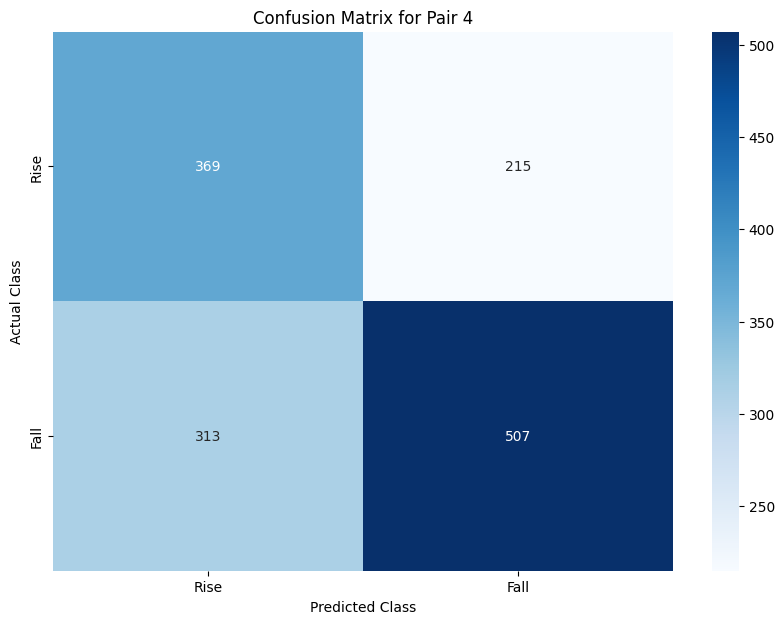

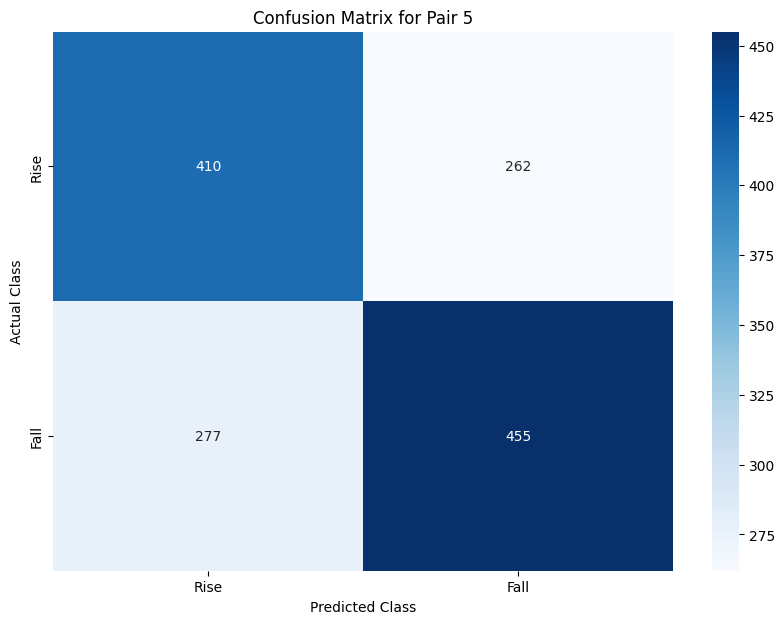

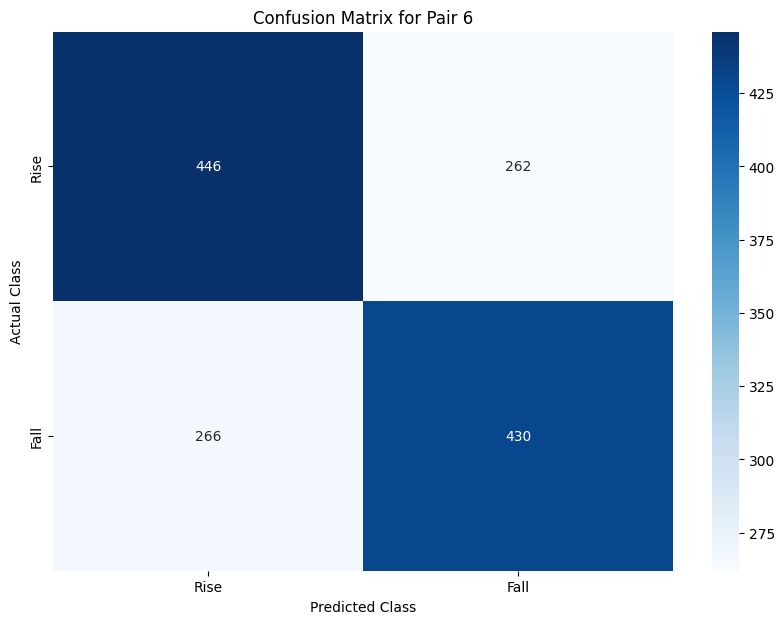

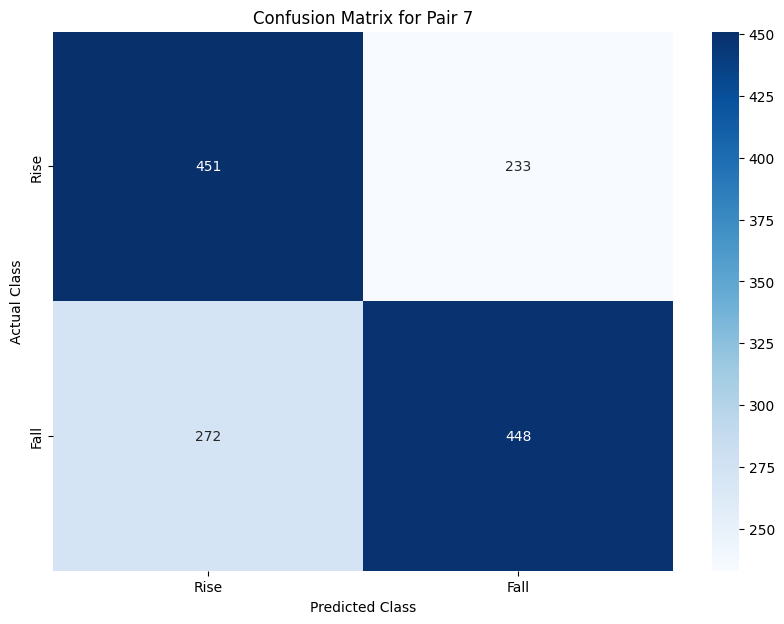

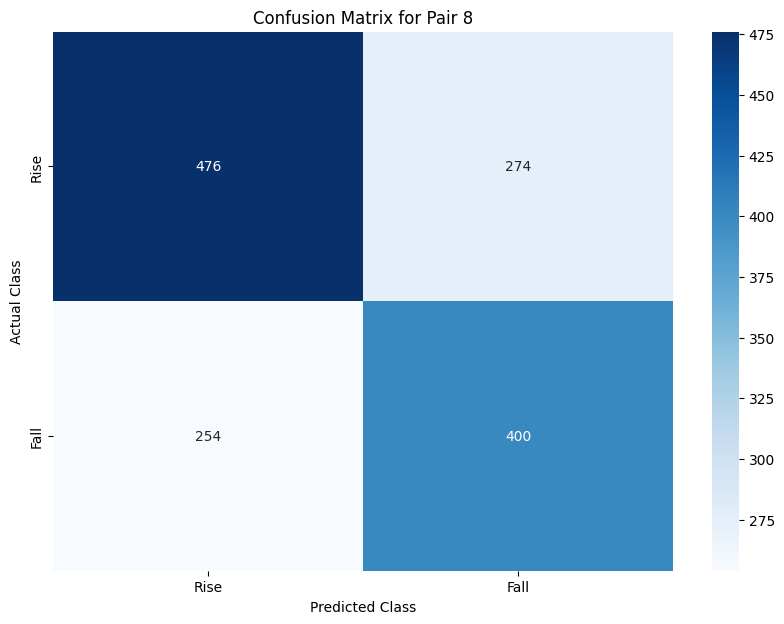

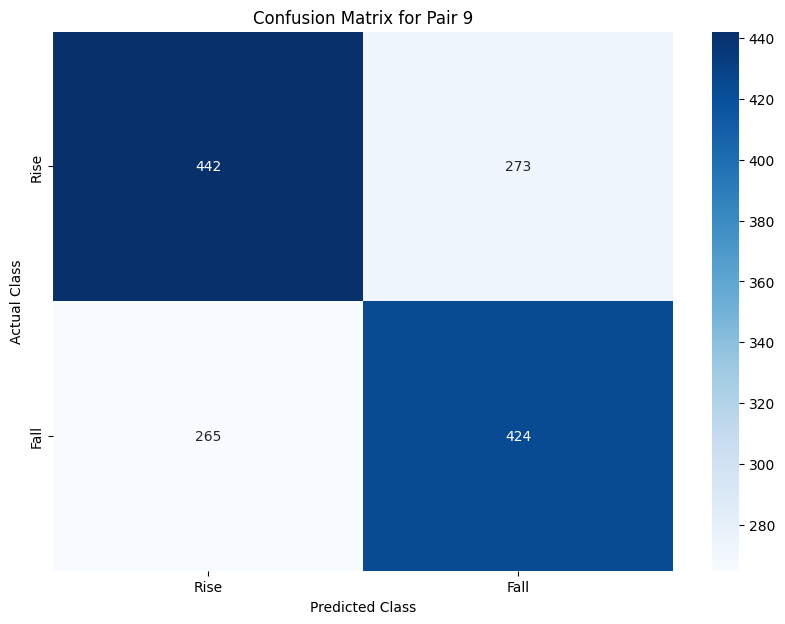

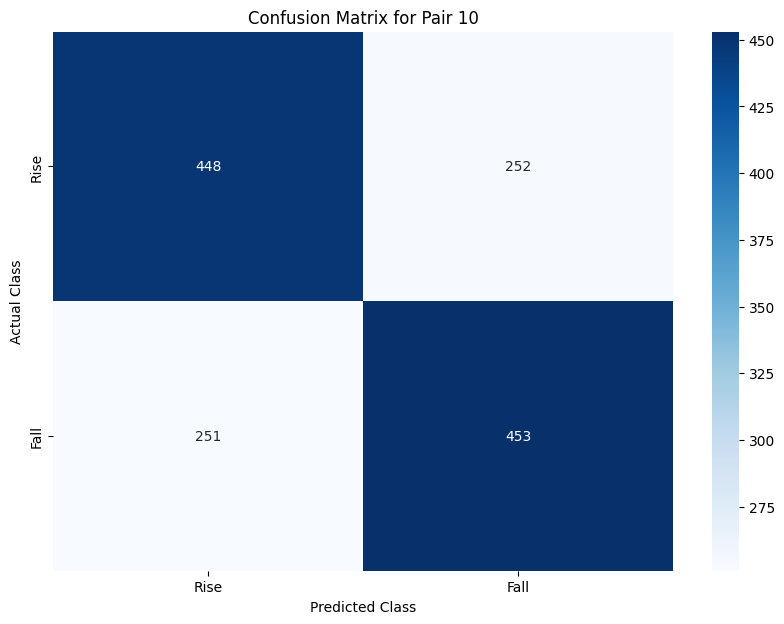

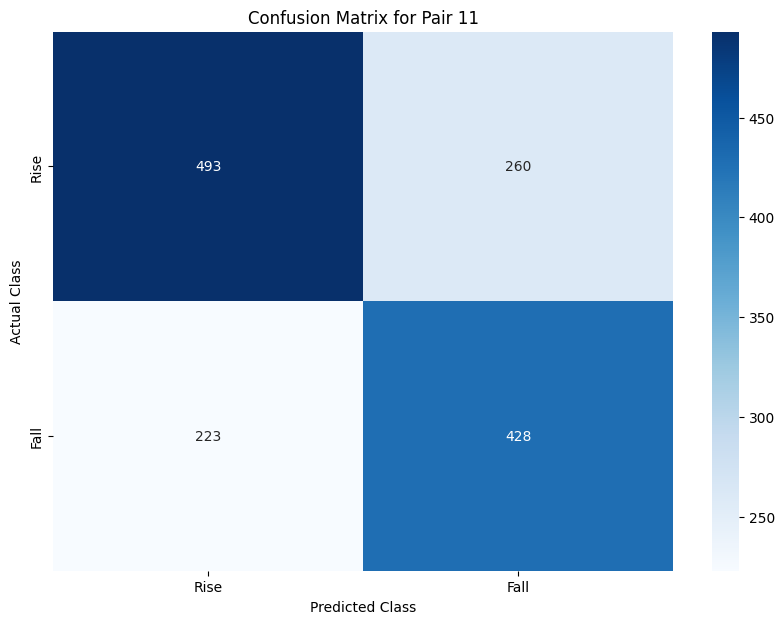

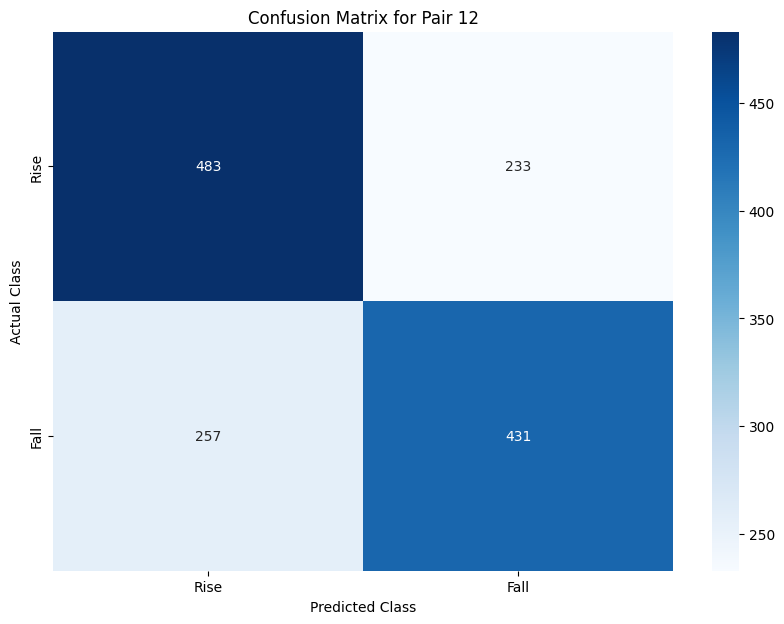

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_accuracy(file_path, actual_data_path, column_number):
    # Load the data
    data = pd.read_csv(file_path)
    
    # Load the actual data
    actual_data = np.loadtxt(actual_data_path, delimiter=',')
    
    # Replace the 'Actual' column with the corresponding column from the actual data
    data['Actual'] = actual_data[-1404:, column_number]
    
    # Check if the signs of 'Predicted' and 'Actual' are the same
    data['Correct'] = np.sign(data['Predicted']) == np.sign(data['Actual'])
    
    # Calculate the accuracy
    accuracy = data['Correct'].mean()
    
    # Calculate TP, TN, FP, FN
    TP = np.sum((data['Predicted'] > 0) & (data['Actual'] > 0))
    TN = np.sum((data['Predicted'] <= 0) & (data['Actual'] <= 0))
    FP = np.sum((data['Predicted'] > 0) & (data['Actual'] <= 0))
    FN = np.sum((data['Predicted'] <= 0) & (data['Actual'] > 0))
    
    return accuracy, TP, TN, FP, FN

# Example usage:
results = []
actual_data_path = r'C:\Users\22941940\2024\Coding\Article\MTGNN\data\preprocessing\data_90_actual.txt'
for i in range(1, 13):  # Assuming pairs are numbered from 1 to 12
    file_path = f'C:\\Users\\22941940\\2024\\Coding\\Article\\MTGNN\\data\\Results\\Horizon 1\\90 day\\pair_{i}.csv'
    accuracy, TP, TN, FP, FN = calculate_accuracy(file_path, actual_data_path, i-1)
    results.append({'Pair': i, 'Accuracy': accuracy, 'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN})

    # Plot confusion matrix
    confusion_matrix = np.array([[TP, FP], [FN, TN]])
    plt.figure(figsize=(10,7))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Rise', 'Fall'], yticklabels=['Rise', 'Fall'])
    plt.title(f'Confusion Matrix for Pair {i}')
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.savefig(f'C:\\Users\\22941940\\2024\\Coding\\Article\\MTGNN\\data\\Results\\Horizon 1\\90 day\\pair_{i}_trend.jpeg')
    plt.show()


# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

In [30]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

    Pair  Accuracy   TP   TN   FP   FN
0      1  0.630342  412  473  237  282
1      2  0.631766  486  402  264  252
2      3  0.638177  428  468  251  257
3      4  0.623932  369  507  215  313
4      5  0.615385  410  455  262  277
5      6  0.623219  446  430  262  266
6      7  0.640313  451  448  233  272
7      8  0.623932  476  400  274  254
8      9  0.616809  442  424  273  265
9     10  0.641738  448  453  252  251
10    11  0.655983  493  428  260  223
11    12  0.650997  483  431  233  257


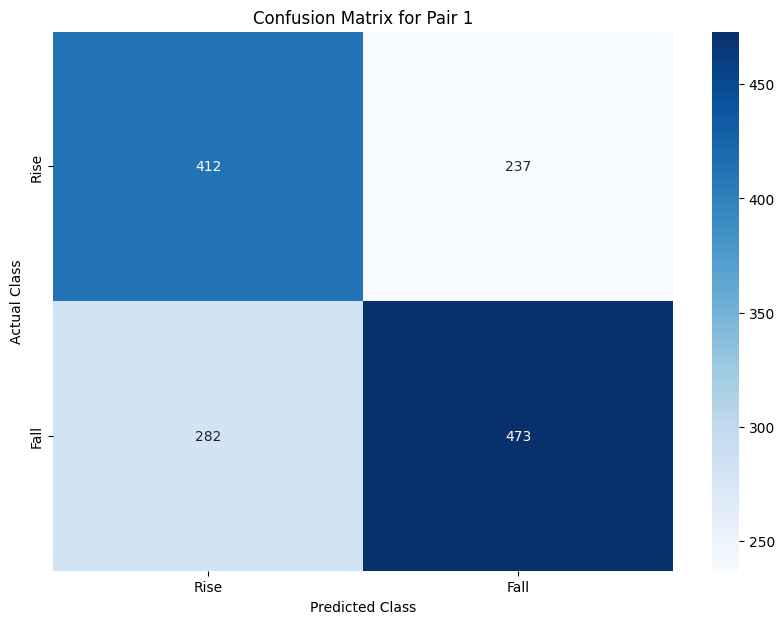

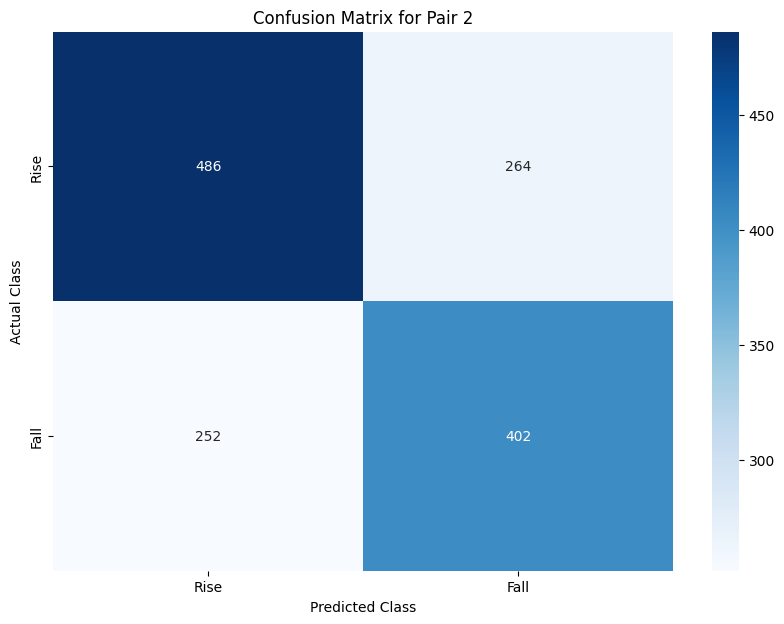

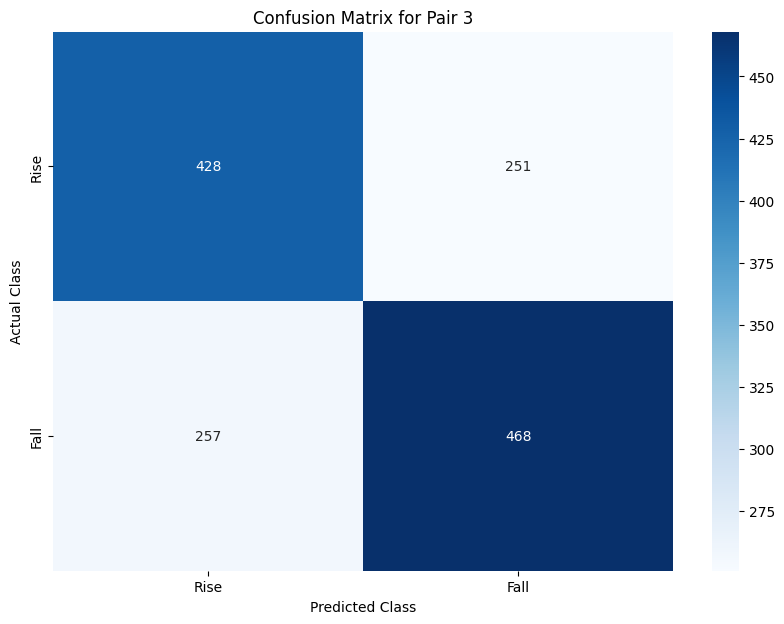

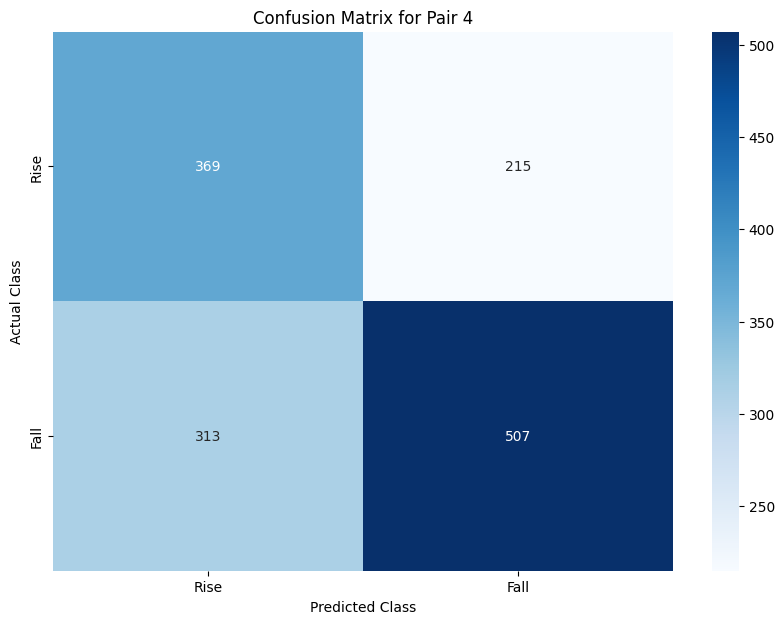

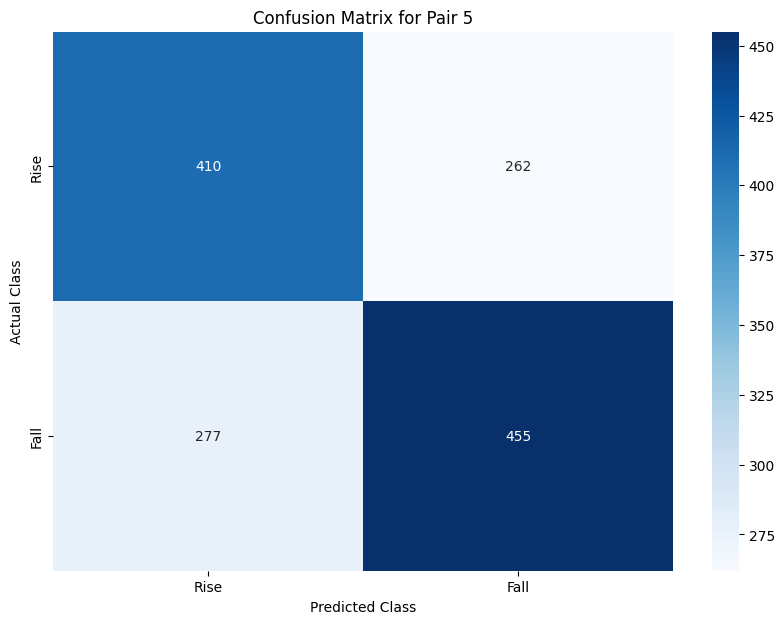

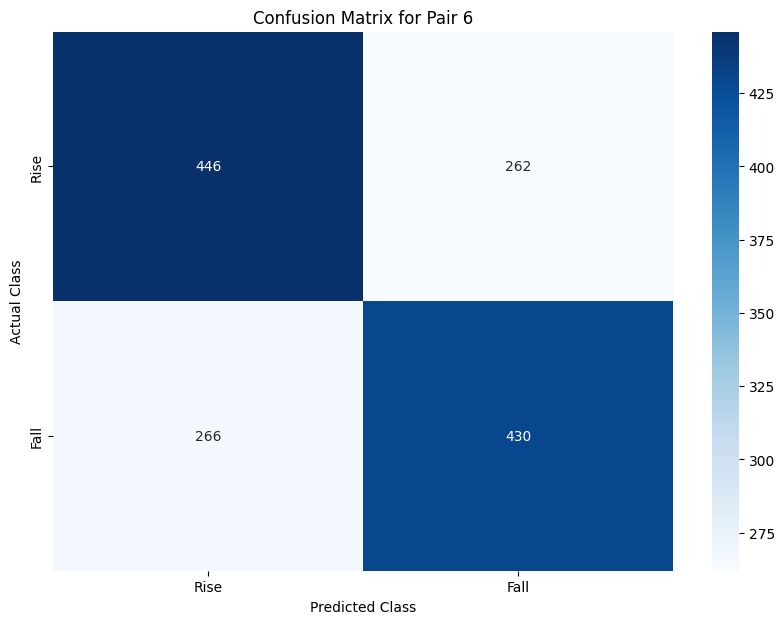

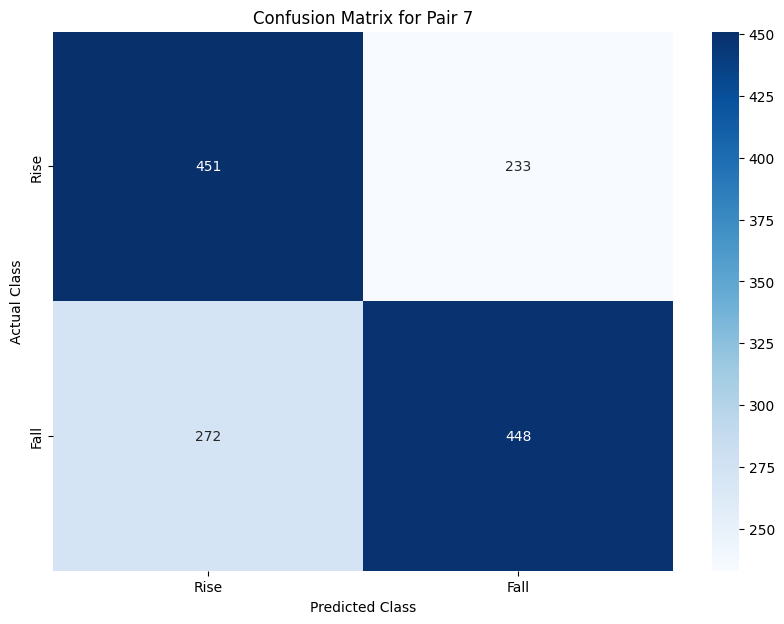

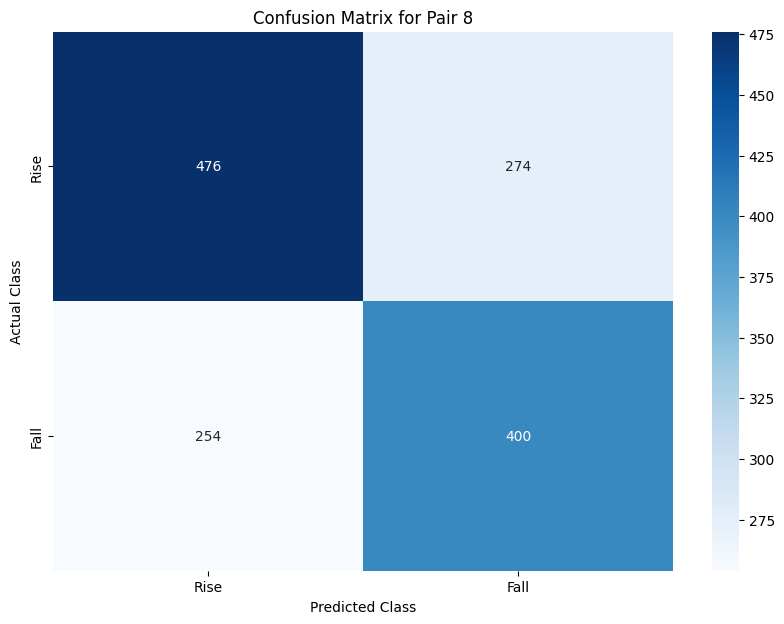

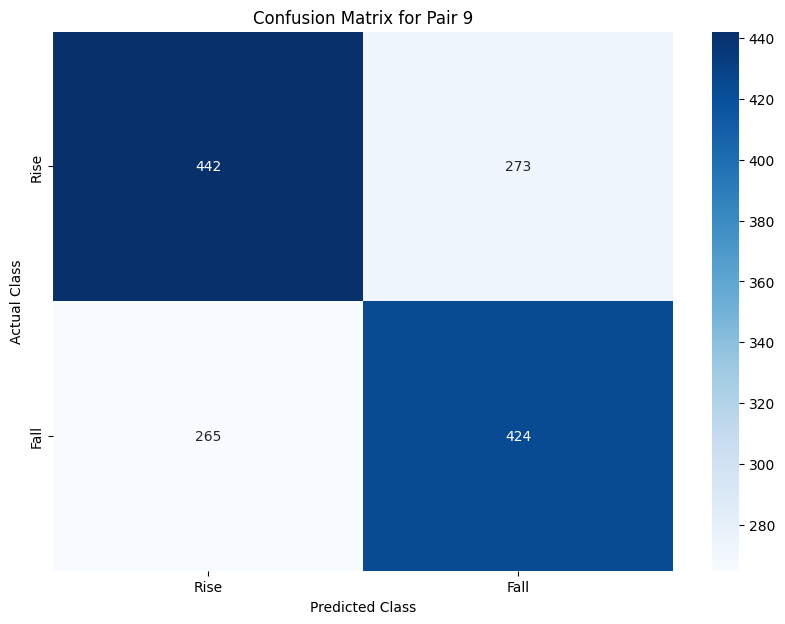

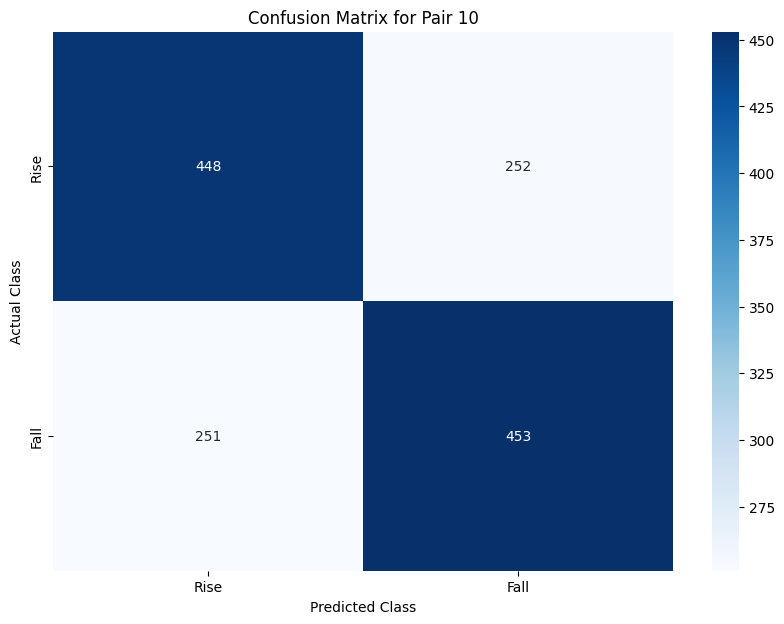

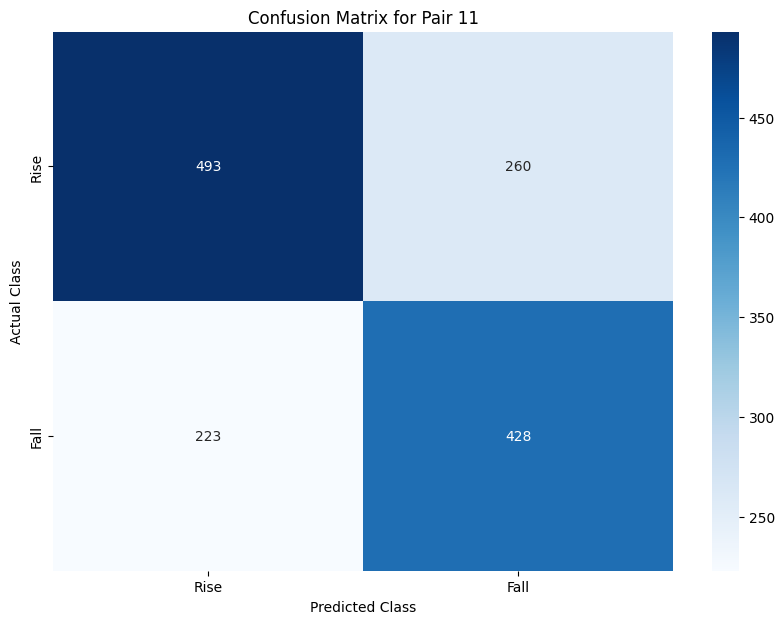

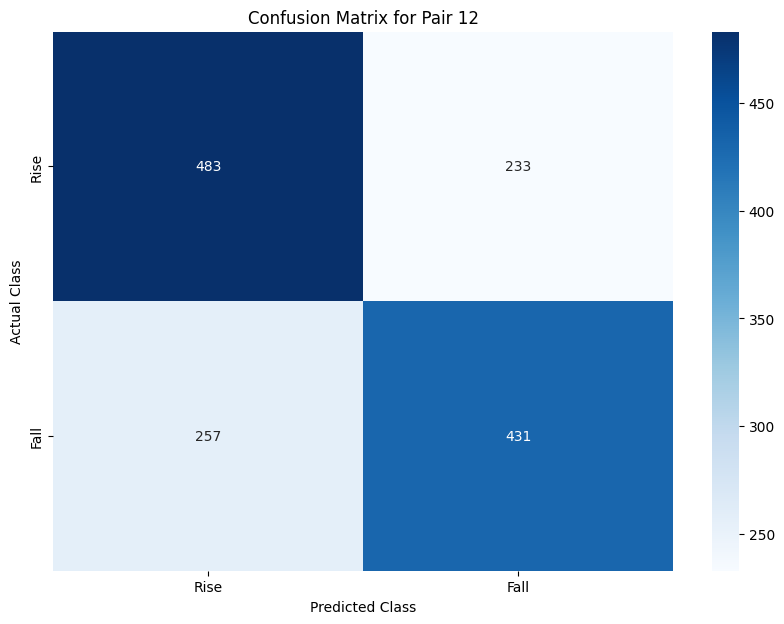

    Pair  Accuracy   TP   TN   FP   FN
0      1  0.630342  412  473  237  282
1      2  0.631766  486  402  264  252
2      3  0.638177  428  468  251  257
3      4  0.623932  369  507  215  313
4      5  0.615385  410  455  262  277
5      6  0.623219  446  430  262  266
6      7  0.640313  451  448  233  272
7      8  0.623932  476  400  274  254
8      9  0.616809  442  424  273  265
9     10  0.641738  448  453  252  251
10    11  0.655983  493  428  260  223
11    12  0.650997  483  431  233  257


In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_accuracy(file_path, actual_data_path, column_number):
    # Load the data
    data = pd.read_csv(file_path)
    
    # Load the actual data
    actual_data = np.loadtxt(actual_data_path, delimiter=',')
    
    # Replace the 'Actual' column with the corresponding column from the actual data
    data['Actual'] = actual_data[-len(data):, column_number]
    
    # Check if the signs of 'Predicted' and 'Actual' are the same
    data['Correct'] = np.sign(data['Predicted']) == np.sign(data['Actual'])
    
    # Calculate the accuracy
    accuracy = data['Correct'].mean()
    
    # Calculate TP, TN, FP, FN
    TP = np.sum((data['Predicted'] > 0) & (data['Actual'] > 0))
    TN = np.sum((data['Predicted'] <= 0) & (data['Actual'] <= 0))
    FP = np.sum((data['Predicted'] > 0) & (data['Actual'] <= 0))
    FN = np.sum((data['Predicted'] <= 0) & (data['Actual'] > 0))
    
    return accuracy, TP, TN, FP, FN

# Example usage:
results = []
actual_data_path = r'C:\Users\22941940\2024\Coding\Article\MTGNN\data\preprocessing\data_90_actual.txt'
for i in range(1, 13):  # Assuming pairs are numbered from 1 to 12
    file_path = f'C:\\Users\\22941940\\2024\\Coding\\Article\\MTGNN\\data\\Results\\Horizon 1\\90 day\\pair_{i}.csv'
    accuracy, TP, TN, FP, FN = calculate_accuracy(file_path, actual_data_path, i-1)
    results.append({'Pair': i, 'Accuracy': accuracy, 'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN})

    # Plot confusion matrix
    confusion_matrix = np.array([[TP, FP], [FN, TN]])
    plt.figure(figsize=(10,7))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Rise', 'Fall'], yticklabels=['Rise', 'Fall'])
    plt.title(f'Confusion Matrix for Pair {i}')
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.savefig(f'C:\\Users\\22941940\\2024\\Coding\\Article\\MTGNN\\data\\Results\\Horizon 1\\90 day\\pair_{i}_trend.jpeg')
    plt.show()


# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

In [1]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

def calculate_accuracy(file_path, actual_data_path, column_number):
    # Load the data
    data = pd.read_csv(file_path)
    
    # Load the actual data
    actual_data = np.loadtxt(actual_data_path, delimiter=',')
    
    # Replace the 'Actual' column with the corresponding column from the actual data
    data['Actual'] = actual_data[-len(data):, column_number]
    
    # Check if the signs of 'Predicted' and 'Actual' are the same
    data['Correct'] = np.sign(data['Predicted']) == np.sign(data['Actual'])
    
    # Calculate the accuracy
    accuracy = data['Correct'].mean()
    
    # Calculate TP, TN, FP, FN
    TP = np.sum((data['Predicted'] > 0) & (data['Actual'] > 0))
    TN = np.sum((data['Predicted'] <= 0) & (data['Actual'] <= 0))
    FP = np.sum((data['Predicted'] > 0) & (data['Actual'] <= 0))
    FN = np.sum((data['Predicted'] <= 0) & (data['Actual'] > 0))
    
    # Convert continuous predictions to binary class labels
    data['Predicted'] = (data['Predicted'] > 0).astype(int)
    data['Actual'] = (data['Actual'] > 0).astype(int)
    
    # Calculate the AUC
    auc = roc_auc_score(data['Actual'], data['Predicted'])
    
    # Calculate Precision, Recall, F1 Score, and Specificity
    precision = precision_score(data['Actual'], data['Predicted'])
    recall = recall_score(data['Actual'], data['Predicted'])
    f1 = f1_score(data['Actual'], data['Predicted'])
    specificity = TN / (TN + FP)
    
    return accuracy, TP, TN, FP, FN, auc, precision, recall, f1, specificity

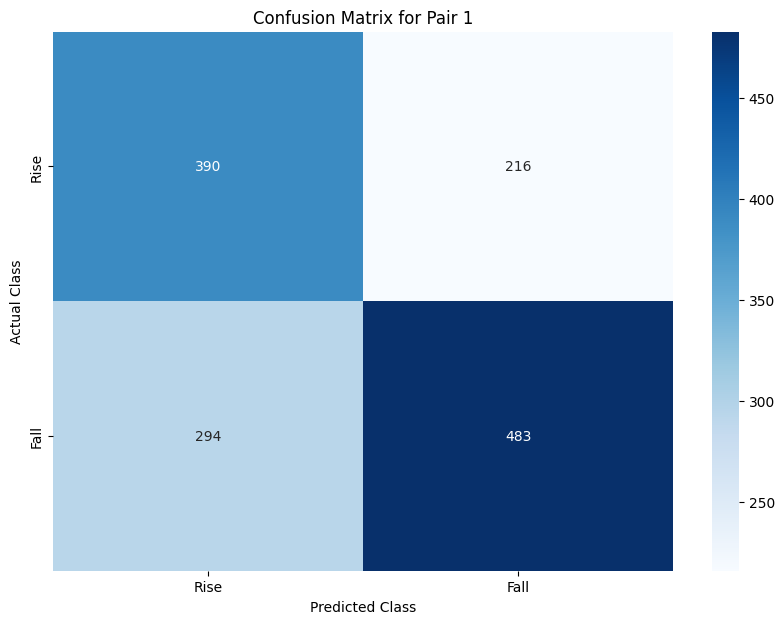

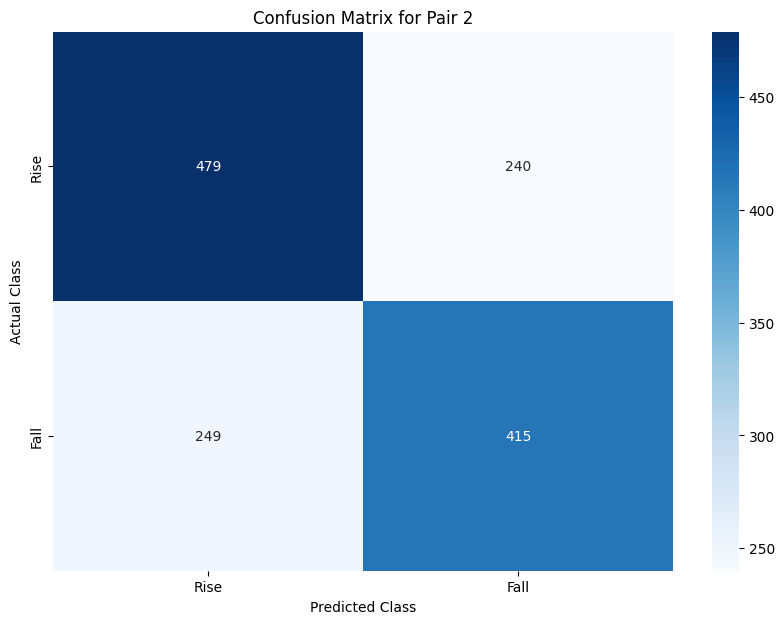

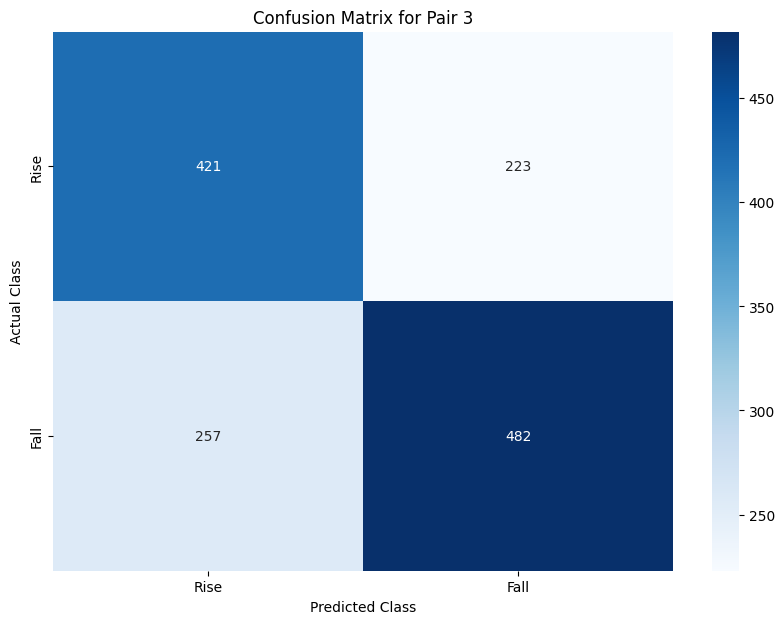

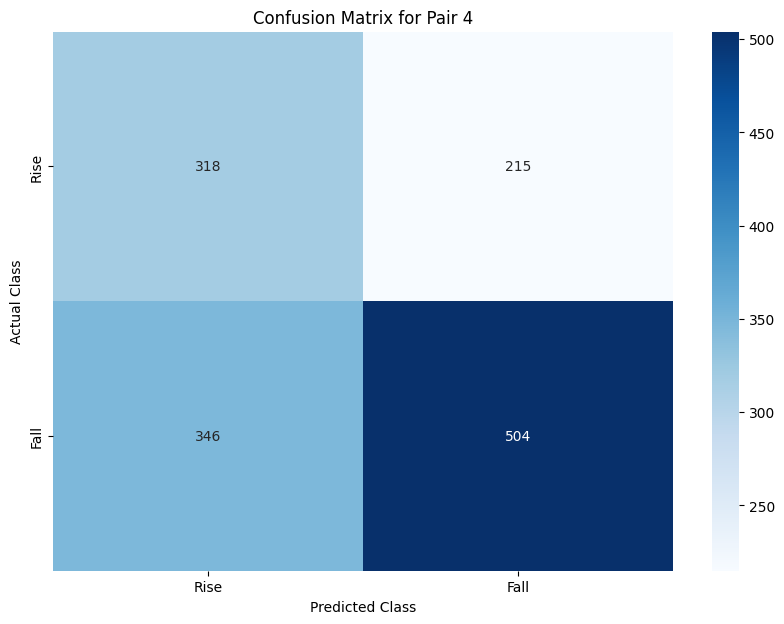

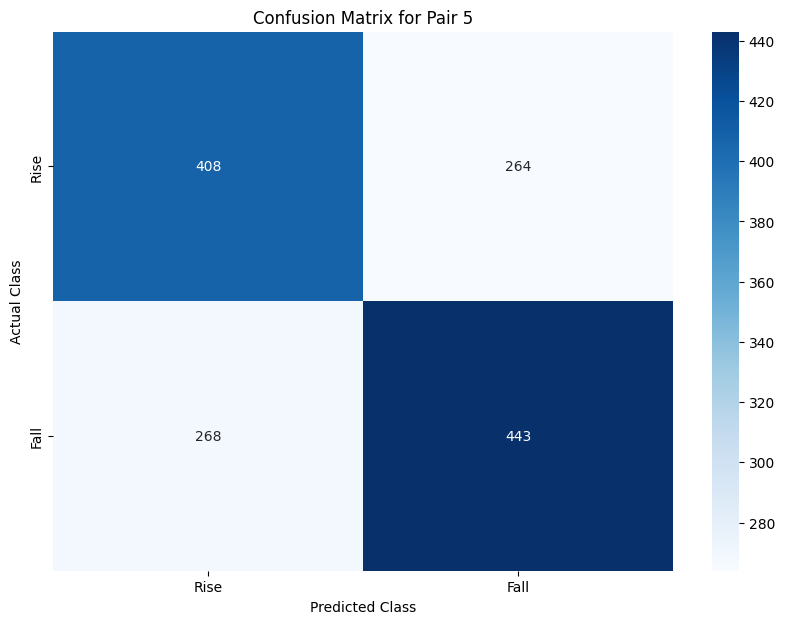

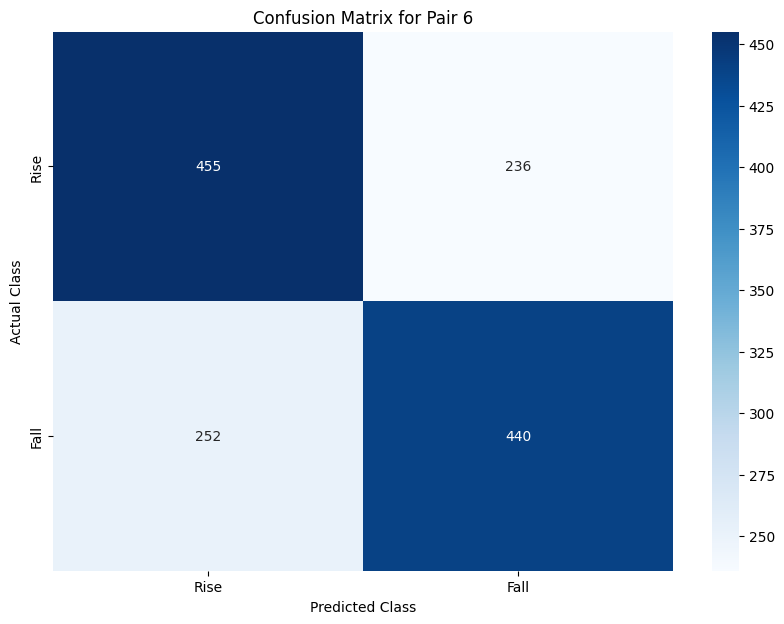

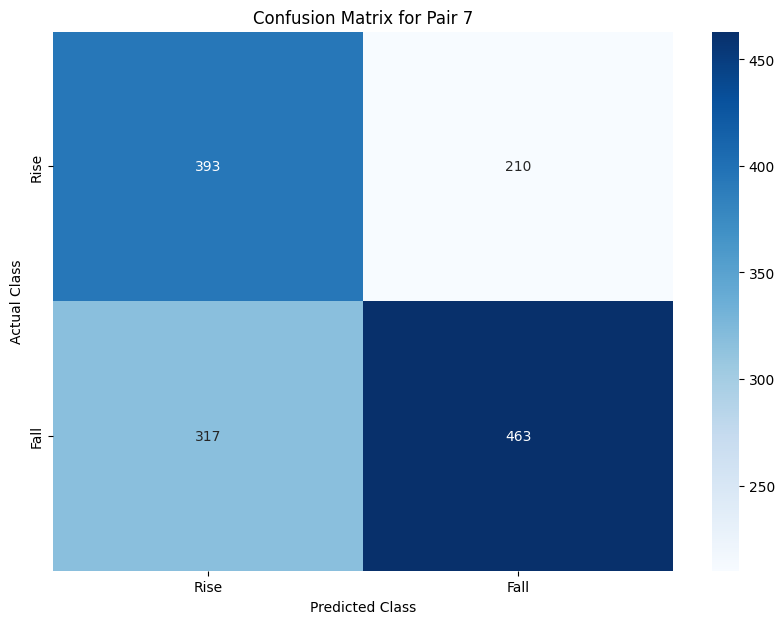

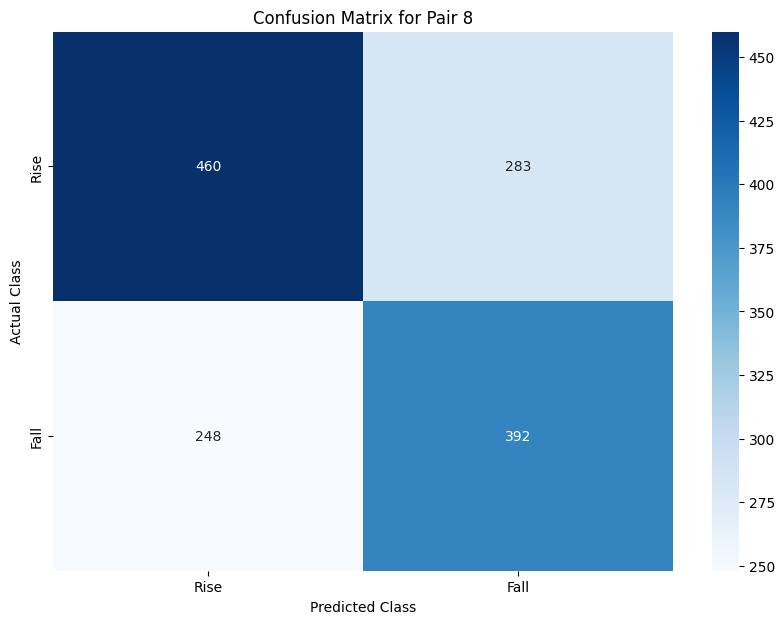

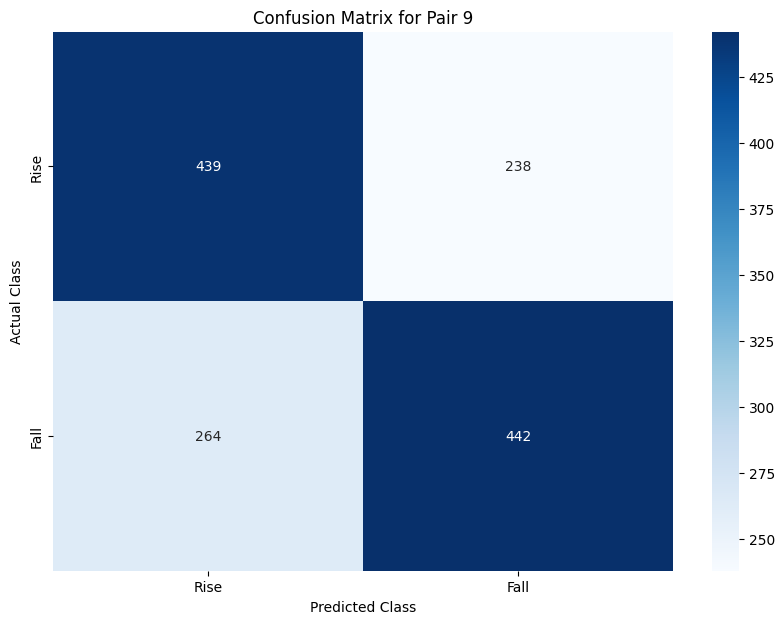

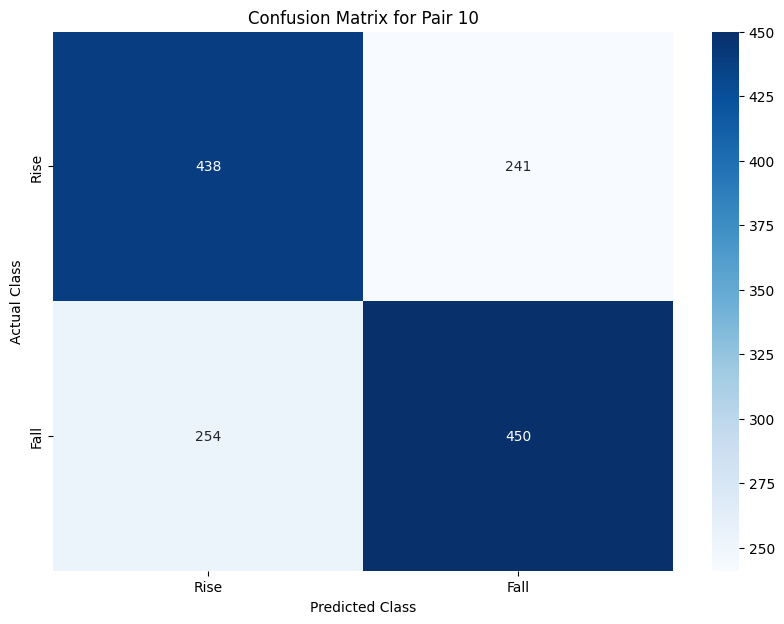

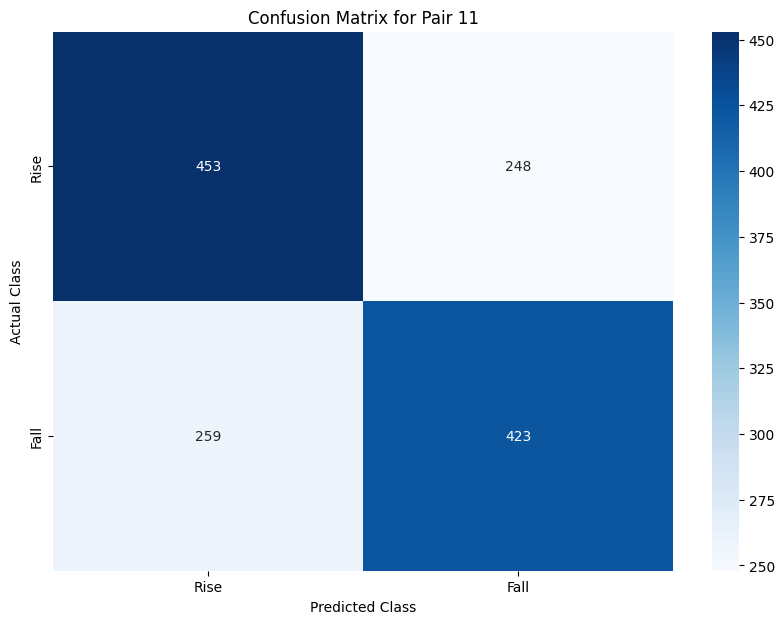

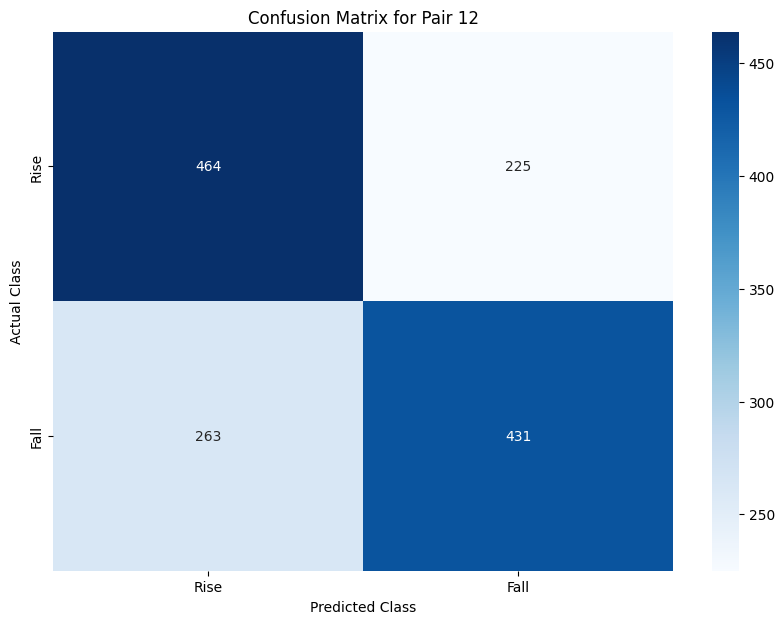

    Pair  Accuracy   TP   TN   FP   FN       AUC  Precision    Recall  \
0      1  0.631236  390  483  216  294  0.630581   0.643564  0.570175   
1      2  0.645698  479  415  240  249  0.645777   0.666203  0.657967   
2      3  0.652928  421  482  223  257  0.652316   0.653727  0.620944   
3      4  0.594360  318  504  215  346  0.589945   0.596623  0.478916   
4      5  0.614606  408  443  264  268  0.615071   0.607143  0.603550   
5      6  0.647144  455  440  236  252  0.647226   0.658466  0.643564   
6      7  0.618944  393  463  210  317  0.620743   0.651741  0.553521   
7      8  0.616052  460  392  283  248  0.615229   0.619112  0.649718   
8      9  0.637021  439  442  238  264  0.637233   0.648449  0.624467   
9     10  0.641359  438  450  241  254  0.642089   0.645066  0.632948   
10    11  0.633406  453  423  248  259  0.633319   0.646220  0.636236   
11    12  0.647144  464  431  225  263  0.647626   0.673440  0.638239   

    F1 Score  Specificity  
0   0.604651     0.690

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

results = []
actual_data_path = r'C:\Users\22941940\2024\Coding\Article\MTGNN\data\preprocessing\data_128_actual.txt'
for i in range(1, 13):  # Assuming pairs are numbered from 1 to 12
    file_path = f'C:\\Users\\22941940\\2024\\Coding\\Article\\MTGNN\\data\\Results\\Horizon 1\\128 day\\pair_{i}.csv'
    accuracy, TP, TN, FP, FN, auc, precision, recall, f1, specificity = calculate_accuracy(file_path, actual_data_path, i-1)
    results.append({
        'Pair': i, 
        'Accuracy': accuracy, 
        'TP': TP, 
        'TN': TN, 
        'FP': FP, 
        'FN': FN, 
        'AUC': auc,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Specificity': specificity
    })

    # Plot confusion matrix
    confusion_matrix = np.array([[TP, FP], [FN, TN]])
    plt.figure(figsize=(10,7))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Rise', 'Fall'], yticklabels=['Rise', 'Fall'])
    plt.title(f'Confusion Matrix for Pair {i}')
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)